# **SastaTicket:** Flight Price Prediction Model

---

**Participant**\

**Name** : "Muhammad Talha Munir"\
**email** : "mtalhamunir123@gmail.com"\
**Mobile No** : "00923115472492"

---


**Instructions**
- Ahmed is a customer of Sastaticket.pk. He is planning to fly from Karachi to Islamabad for his
brother’s wedding and is currently in the process of choosing tickets. Ahmed has to go to
Islamabad but Ahmed also wants to save some money in the process, so he chooses to wait
instead of buy now, simply because ticket prices are just too high.\
- Is this the right decision? Won’t ticket prices increase in the future? Perhaps there is a
sweet-spot Ahmed is hoping to find and maybe he just might find it.\
- This is the problem that you will be tackling in this competition. Can you predict future prices
accurately to such a degree that you can now tell Ahmed - with confidence - that he has made
the wrong decision.\
- Your task boils down to generating optimal predictions for flight prices of multiple airlines. If
successful, your model will contribute greatly to Sastaticket’s rich and diverse set of operating
algorithms.

**Summary**
1. Find Cheapest and expenses flights at specific time.\
2. You have to go through EDA(Exploratory Data Analysis) Process.\
3. Apply an appropriate Machine Learning Model.\
4. Find a sweet spot for cheap ticket

### **1. Importing Relevant Libraries**

In [1]:
# Importing Libraries
import pandas as pd
from pandas import MultiIndex, Int16Dtype

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reproductability :** *A good practice to set the seed to reproduce the Same Results*

In [2]:
SEED = 10
np.random.seed(SEED)

### **2. Loading Train and Test Data_Sets**

In [3]:
# Loading Data_Sets into Data_Frames
df=  pd.read_csv('sastaTicket_train.csv')
df1= pd.read_csv('sastaticket_test.csv')

**Interpreting Data_Set**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5000 non-null   int64  
 1   f1          5000 non-null   object 
 2   f2          5000 non-null   object 
 3   f3          5000 non-null   object 
 4   f4          5000 non-null   object 
 5   f5          5000 non-null   object 
 6   f6          5000 non-null   object 
 7   f7          5000 non-null   bool   
 8   f8          5000 non-null   float64
 9   f9          5000 non-null   int64  
 10  f10         5000 non-null   object 
 11  target      5000 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 434.7+ KB


***Renaming The Columns for Ease***

In [5]:
# Renaming Our Columns
df.rename({'f1': 'Buying_Time', 'f2': 'Origin' , 'f3':'Destination', 'f4': 'Depart_Time', 'f5':'Arrival_Time' , 'f6':'Airline',
        'f7': 'Ticket_Refunded', 'f8':'Bag_Weight', 'f9':'Bag_Pieces' , 'f10':'Airline_No.','target':'Fare'}
         , axis=1, inplace=True)
df1.rename({'f1': 'Buying_Time', 'f2': 'Origin' , 'f3':'Destination', 'f4': 'Depart_Time', 'f5':'Arrival_Time' , 'f6':'Airline',
        'f7': 'Ticket_Refunded', 'f8':'Bag_Weight', 'f9':'Bag_Pieces' , 'f10':'Airline_No.'}
         , axis=1, inplace=True)

***Dropping Unnecessary Columns***

In [6]:
df.drop(['Origin','Destination','Airline_No.','Unnamed: 0'],axis=1,inplace=True)                                          
df1.drop(['Origin','Destination','Airline_No.','Unnamed: 0'],axis=1,inplace=True) 

### **3. Data Munging**

**Type Casting**

In [7]:
df[['Arrival_Time','Depart_Time','Buying_Time']] = df[['Arrival_Time',"Depart_Time",'Buying_Time']].apply(pd.to_datetime)
df1[['Arrival_Time','Depart_Time','Buying_Time']] = df1[['Arrival_Time',"Depart_Time",'Buying_Time']].apply(pd.to_datetime)

**Feature Engineering**

In [8]:
date_format_string= '%Y/%m/%d %.f'


f1= pd.to_datetime(df['Buying_Time'], date_format_string)
f2= pd.to_datetime(df['Depart_Time'], date_format_string)
f3= pd.to_datetime(df['Arrival_Time'], date_format_string)

f11= pd.to_datetime(df1['Buying_Time'], date_format_string)
f22= pd.to_datetime(df1['Depart_Time'], date_format_string)
f33= pd.to_datetime(df1['Arrival_Time'], date_format_string)


    # Feature Engineering
diff = f2-f1
df['Days_to_Depart'] = diff 
df['Days_to_Depart'] = df['Days_to_Depart'].dt.days.values

df['hrs_to_Depart'] = diff 
df['hrs_to_Depart'] = df['hrs_to_Depart'].dt.components['hours']


df['min_to_Depart'] = diff 
df['min_to_Depart'] = df['min_to_Depart'].dt.components['minutes']



    # Feature Engineering
diff1 = f22-f11
df1['Days_to_Depart'] = diff 
df1['Days_to_Depart'] = df1['Days_to_Depart'].dt.days.values

df1['hrs_to_Depart'] = diff 
df1['hrs_to_Depart'] = df1['hrs_to_Depart'].dt.components['hours']


df1['min_to_Depart'] = diff 
df1['min_to_Depart'] = df1['min_to_Depart'].dt.components['minutes']


**Again Dropping unuseful columns**

In [9]:
df.drop(['Buying_Time','Depart_Time','Arrival_Time'],axis=1,inplace=True)      # Again Removing Unnecssary Columns
df1.drop(['Buying_Time','Depart_Time','Arrival_Time','hrs_to_Depart','min_to_Depart'],axis=1,inplace=True)

### **4. Doing Statistical Analysis**

**Checking Missing Values**

In [10]:
df.isnull().sum()

Airline            0
Ticket_Refunded    0
Bag_Weight         0
Bag_Pieces         0
Fare               0
Days_to_Depart     0
hrs_to_Depart      0
min_to_Depart      0
dtype: int64

In [11]:
df.describe(include='all')

,Airline,Ticket_Refunded,Bag_Weight,Bag_Pieces,Fare,Days_to_Depart,hrs_to_Depart,min_to_Depart
count,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
unique,4,2,NaN,NaN,NaN,NaN,NaN,NaN
top,alpha,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,2211,4968,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,22.727400,0.944000,10084.847000,14.971600,11.84600,29.700000
std,NaN,NaN,8.902075,0.606084,3374.189875,18.918498,7.27294,17.462812
min,NaN,NaN,0.000000,0.000000,4990.000000,0.000000,0.00000,0.000000
25%,NaN,NaN,20.000000,1.000000,7796.000000,4.000000,5.00000,14.000000
50%,NaN,NaN,20.000000,1.000000,9150.000000,10.000000,12.00000,30.000000
75%,NaN,NaN,32.000000,1.000000,11245.000000,19.000000,18.00000,45.000000


**Dropping Duplicate Values**

In [12]:
df.drop_duplicates(keep=False,inplace=True)

***Making list of Categorical Column and Numerical Ones**

In [13]:
cat_cols= ['Airline','Ticket_Refunded','Bag_Weight','Bag_Pieces']
num_cols= ['Days_to_Depart','hrs_to_Depart','min_to_Depart']

### **5. PLOTTING and VISUALIZATION**

**Count Plot**

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

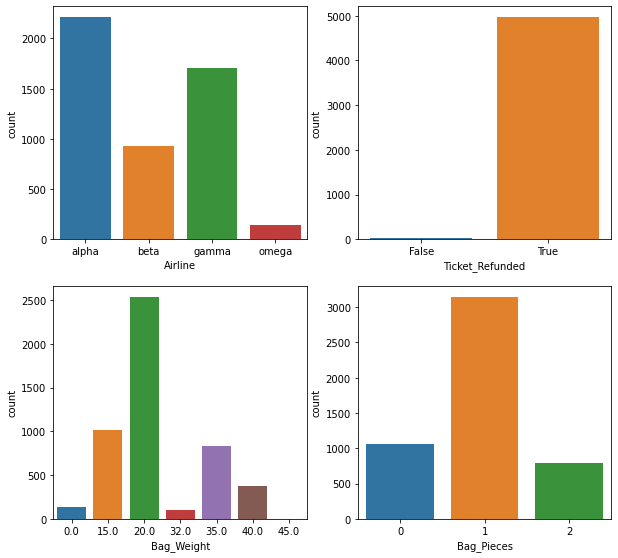

In [14]:
# Categorical Count Plotting
plt.figure (figsize=(10,30))                        
c=1
for i in cat_cols:
    plt.subplot(6,2,c)
    sns.countplot(df[i])                
    c=c+1
plt.show()


Results:\
    1. **Alpha** has higher number of flights\
    2. Mostly Tickets are Refund-able\
    3. Most Passengers have 2 piece of Bag and the avg weight is 20.

**Dist Plot**

<Figure size 720x576 with 0 Axes>

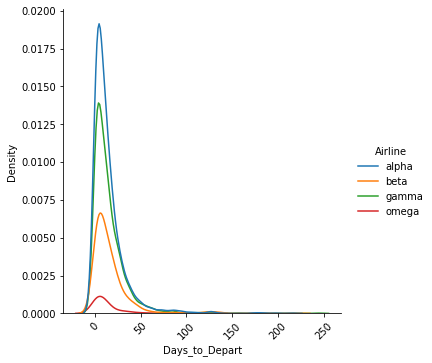

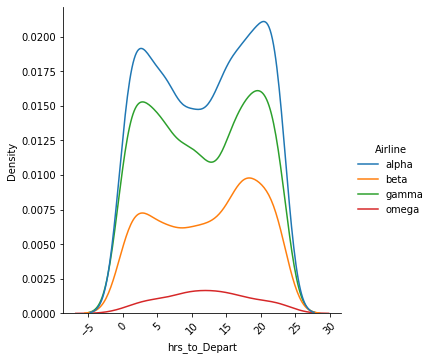

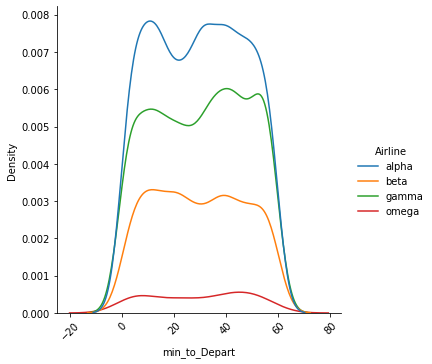

In [15]:
# plotting numerical data
c=1
plt.figure(figsize=(10,8))
for i in num_cols:
    sns.displot(df,
        x=df[i],
        hue="Airline",
        kind="kde",
        warn_singular=False)
    plt.xticks(rotation=45)
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

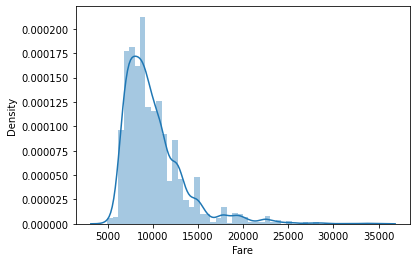

In [16]:
sns.distplot(df['Fare'])

**Result:** *Looks Right Skewed.*

### **6. Normalization Test**

In [18]:
# Importing Library
from scipy.stats import shapiro

stat, p = shapiro(df['Fare'])

print ("stat = %.3f , p-value=%.3f" %(stat,p))

if p > 0.05:
    print('H1: Probably Gaussian or Normal distribution')
else:
    print('H0: Probably NO Gaussian or Normal distribution')

stat = 0.823 , p-value=0.000
H0: Probably NO Gaussian or Normal distribution


#### **Normalizing The Data**

In [19]:
df['Fare']=np.log(df['Fare'])

# df['Days_to_Depart'] = (df['Days_to_Depart']-df['Days_to_Depart'].mean()) / df['Days_to_Depart'].std()
# df['hrs_to_Depart']=    (df['hrs_to_Depart']-df['hrs_to_Depart'].mean()) / df['hrs_to_Depart'].std()
# df['Bag_Weight']=   (df['Bag_Weight']-df['Bag_Weight'].mean()) / df['Bag_Weight'].std()
# df['Fare'] = (df['Fare']-df['Fare'].mean()) / df['Fare'].std()
# df['min_to_Depart']= (df['min_to_Depart']-df['min_to_Depart'].mean()) / df['min_to_Depart'].std()
df.head(5)

,Airline,Ticket_Refunded,Bag_Weight,Bag_Pieces,Fare,Days_to_Depart,hrs_to_Depart,min_to_Depart
0,alpha,True,35.0,1,9.591854,8,1,7
1,alpha,True,35.0,1,9.180603,11,20,48
2,beta,True,20.0,0,8.814925,17,21,7
3,gamma,True,20.0,1,9.354008,21,5,53
4,gamma,True,32.0,1,9.175231,1,1,21


### **7. Checking Outliers and removing them on percentage basis**

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Days_to_Depart'>

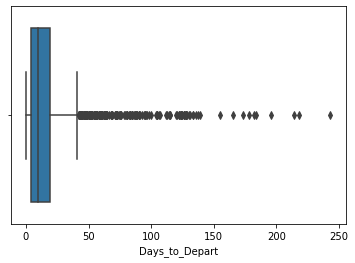

In [20]:
sns.boxplot(df['Days_to_Depart'])

In [21]:
df = df[df['Days_to_Depart'] < 60]              # Removing Days to depart a Flight as there less numbers that buy tickets way before the flight Depart

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Days_to_Depart'>

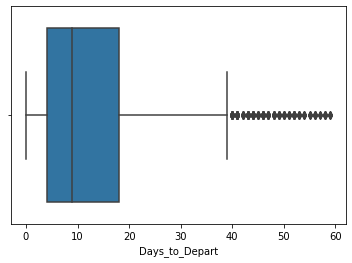

In [22]:
sns.boxplot(df['Days_to_Depart'])

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

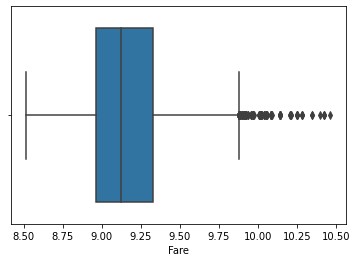

In [23]:
sns.boxplot(df['Fare'])

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bag_Weight'>

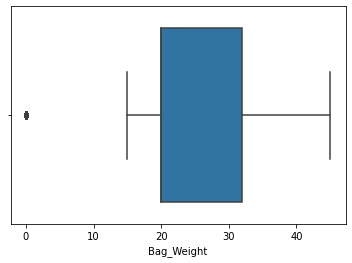

In [24]:
sns.boxplot(df['Bag_Weight'])

*Since Data isn't normal we can check the coorelation as well.*

In [25]:
corr= df.corr(method='pearson')   # Correlation range from 1 to -1
corr.style.background_gradient(cmap='Accent')

,Ticket_Refunded,Bag_Weight,Bag_Pieces,Fare,Days_to_Depart,hrs_to_Depart,min_to_Depart
Ticket_Refunded,1.000000,-0.009647,0.126914,0.008074,0.001422,0.007402,0.004935
Bag_Weight,-0.009647,1.000000,-0.158667,0.204827,-0.012509,0.013716,0.009111
Bag_Pieces,0.126914,-0.158667,1.000000,0.171350,0.000111,-0.043049,0.002921
Fare,0.008074,0.204827,0.171350,1.000000,-0.201484,-0.020851,-0.006717
Days_to_Depart,0.001422,-0.012509,0.000111,-0.201484,1.000000,-0.001151,0.010868
hrs_to_Depart,0.007402,0.013716,-0.043049,-0.020851,-0.001151,1.000000,0.002559
min_to_Depart,0.004935,0.009111,0.002921,-0.006717,0.010868,0.002559,1.000000


**Result:** *Fare has slight Corelation between Bag_weight,Pieces,Days_to_Depart.* 

<AxesSubplot:xlabel='Airline', ylabel='Fare'>

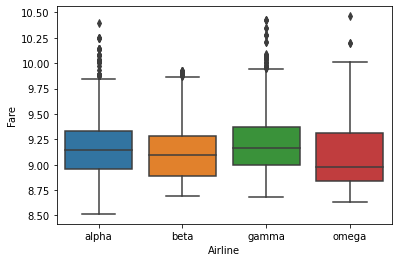

In [26]:
sns.boxplot(data=df , x="Airline",y='Fare')

*Omega Has relatively Low Fare from Other Airlines but on the other hand they have low no. of flights*

In [27]:
df['Airline'].value_counts()

alpha    2148
gamma    1663
beta      902
omega     143
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Days_to_Depart'>

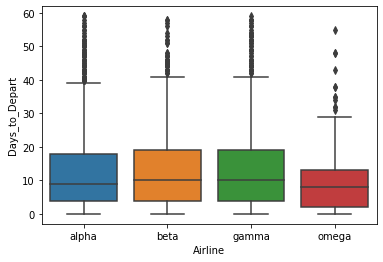

In [28]:
sns.boxplot(data=df,x='Airline',y='Days_to_Depart')

*Less Days for Omega flight to Departure.*

### **8. Applying Machine_Learning Models**

#### ***Encoding***

In [29]:
from sklearn.preprocessing import LabelEncoder  as le      # Importing Encoder

In [30]:
df['Airline'] = le().fit_transform(df['Airline'])
df['Ticket_Refunded'] = le().fit_transform(df['Ticket_Refunded'])

df1['Airline'] = le().fit_transform(df1['Airline'])
df1['Ticket_Refunded'] = le().fit_transform(df1['Ticket_Refunded'])

**Important Feature**

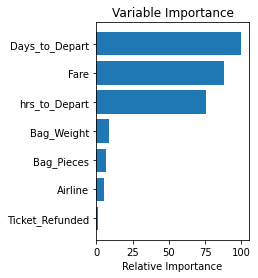

In [66]:
from sklearn.ensemble import ExtraTreesRegressor

df_name = df.columns
clf = ExtraTreesRegressor(n_estimators=250,
                              random_state=SEED)

clf.fit(df[df_name[0:7]],df[df_name[7]])


# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
#boston.feature_names[sorted_idx])

plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

#### ***Splittin into X and Y***

In [44]:
X= df[['Airline','Ticket_Refunded','Bag_Weight','Bag_Pieces','Days_to_Depart']]
y= df['Fare']

In [57]:
X.shape

(4856, 5)

In [60]:
# Making df1 Data_Frame equal ot our test data_frame
df1 = df1.sample(4856)

In [47]:
df1.head()

,Airline,Ticket_Refunded,Bag_Weight,Bag_Pieces,Days_to_Depart
758,2,0,20.0,1,3
4009,0,0,20.0,1,41
1820,3,0,20.0,1,25
1056,0,0,20.0,1,8
1552,3,0,20.0,1,61


### ***Machine Learning Modeling***

*Importing Models*

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# For Classification
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.naive_bayes import GaussianNB



from pandas import set_option
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# For Classification
# from pandas.tools.plotting import scatter_matrix
# from sklearn.model_selection import StratifiedKFold


from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,max_error,r2_score,median_absolute_error,mean_squared_log_error

*Models Function*

In [49]:
# Initial Algorithms to fit the data on
def GetBasedModel():
    basedModels = []
    basedModels.append(('Linear Regression', LinearRegression()))
    basedModels.append(('K-Nearest Neigbour', KNeighborsRegressor()))
    basedModels.append(('Decision Tree', DecisionTreeRegressor()))
    basedModels.append(('Support Vector Machine', SVR()))
    basedModels.append(('Ada Boost', AdaBoostRegressor()))
    basedModels.append(('Gradient Boost'  , GradientBoostingRegressor()))
    basedModels.append(('Random Forest'   , RandomForestRegressor()))
    basedModels.append(('Extra Tree Classifier'   , ExtraTreesRegressor()))
    # max_depth = 12, eta = 0.3,n_estimators = 100, objective = 'reg:squarederror',gamma = 0.01

    
    return basedModels

*Metrics Function*

In [50]:
def evaluate_metrics(X_test,y_test,y_pred,model):
    mean_abs_error = mean_absolute_error(y_test,y_pred)
    mean_sq_error = mean_squared_error(y_test,y_pred)
    root_mean_sq_error = mean_squared_error(y_test,y_pred)**0.5
    r2_scr = r2_score(y_test,y_pred)
    median_abs_score = median_absolute_error(y_test,y_pred)
    explained_variance = explained_variance_score(y_test,y_pred)
    max_err = max_error(y_test,y_pred)

    metric_name = ["Mean Absolute Error (MAE)","Mean Square Error (MSE)","Root Mean Squared Error (RMSE)","R2 Score","Median Absolute Error","Explained Variance Score", "Max Error"]

    return metric_name, mean_abs_error, mean_sq_error, root_mean_sq_error, r2_scr, median_abs_score, explained_variance, max_err

*Model Tuning Function*

In [51]:
def BasedLine2(X_train, y_train, X_test, y_test, models):
    results = []
    names = []
    metric_values = []
    metric_names = []

    for name, model in models:
        kfold = KFold(n_splits=10, random_state=SEED, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
        # For scoring Parameters visit: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        results.append(abs(cv_results))
        names.append(name)
        # print(f"{name} {abs(cv_results.mean()):.3f} [{cv_results.std():.3f}]")
        # print(abs(cv_results))
        
        model.fit(X_train, y_train)
        global y_pred
        y_pred = model.predict(X_test)
        m_n, mean_abs_error, mean_sq_error, root_mean_sq_error, r2_scr, median_abs_score, explained_variance, max_err = evaluate_metrics(X_test, y_test, y_pred, models)

        metric_names.append(m_n)
        metric_values.append((mean_abs_error.mean(), mean_sq_error.mean(), root_mean_sq_error.mean(), r2_scr.mean(), median_abs_score.mean(), explained_variance.mean(), max_err.mean()))
        
    return names, results, metric_names, metric_values

*Models Visualization Function*

In [52]:
# Importing Plotting Libraries
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [53]:
class PlotBoxR(object):
    
    def __Trace(self,nameOfFeature,value): 

        trace = go.Box(
            y = value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):

        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))

        py.iplot(data)

*Splitting Data into Traing and Test*

In [54]:
X_train,X_test,y_train,y_test =train_test_split(X, y, test_size=0.2, random_state=42)   # Random sample of 42 from dataset

# X_train, y_train = df[['Airline','Ticket_Refunded','Bag_Weight','Bag_Pieces','Days_to_Depart']].values, df['Fare'].values


*Model Training and Evaluation*

In [55]:
import warnings
warnings.filterwarnings("ignore")

models = GetBasedModel()
names, results, metric_names, metric_values = BasedLine2(X_train, y_train, X_test, y_test, models)
PlotBoxR().PlotResult(names, results)
pd.DataFrame(metric_values, columns=metric_names[0], index=names)

,Mean Absolute Error (MAE),Mean Square Error (MSE),Root Mean Squared Error (RMSE),R2 Score,Median Absolute Error,Explained Variance Score,Max Error
Linear Regression,0.213384,0.072262,0.268815,0.079847,0.188443,0.081683,1.031586
K-Nearest Neigbour,0.214714,0.078296,0.279815,0.003001,0.174715,0.003704,1.177087
Decision Tree,0.202936,0.071014,0.266485,0.095729,0.172438,0.097744,1.016442
Support Vector Machine,0.199066,0.067219,0.259265,0.144062,0.155954,0.148536,1.084740
Ada Boost,0.228907,0.081062,0.284715,-0.032221,0.196691,0.059423,1.065866
Gradient Boost,0.201709,0.068009,0.260785,0.134002,0.170139,0.136039,1.040108
Random Forest,0.203060,0.070503,0.265525,0.102236,0.173752,0.104034,1.014378
Extra Tree Classifier,0.203051,0.070932,0.266331,0.096777,0.172977,0.098593,1.016442


In [ ]:
# another way of Importing Models
# from sklearn.linear_model import LinearRegression 
# from sklearn.tree import DecisionTreeRegressor 
# from sklearn.neighbors import KNeighborsRegressor 
# from sklearn.svm import SVR 
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error



# lr = LinearRegression()
# dt = DecisionTreeRegressor()
# knn = KNeighborsRegressor()
# svr =  SVR()


For Root Mean Square Error Calculation: `rms= mean_squared_error(y_test,y_pred, squared=False)`

#### ***Model Looping on basis of scores*** 

In [ ]:
# X_train,X_test,y_train,y_test =train_test_split(X, y, test_size=0.2, random_state=42)               # Random sample of 42 from dataset


# for i in [lr,dt,knn,svr]:                           # Reading all Models
#         i.fit(X_train,y_train)                      # Fitting the Models
#         pred = i.predict(X_test)                    # Predicting the values
#         test_score = r2_score(y_test, pred)         # test score
#         train_score =  r2_score(y_train, i.predict(X_train))        # train score
#         if abs(train_score-test_score) <= 0.1:
#             print(i)
#             print('R2 Score: ', r2_score(y_test,pred))
#             print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))
#             print('Mean Squared Error: ', mean_squared_error(y_test,pred))
#             print('Root Mean Square Error: ', mean_squared_error(y_test,pred, squared=False))



#### ***Final prediciton on given values for Linear Regression***

In [61]:
lr = LinearRegression().fit(X,y)                    # Fitting Original X and y
pred = lr.predict(df1)

# To save the predicted model
res = pd.DataFrame(pred)
res.index = X.index        # it's important for comparison
res.columns = ['Prediction']
res.to_csv('Prediction_results.csv')

In [62]:
df3 = pd.read_csv('Prediction_results.csv')         # Reading Predicted File
df3.head()

,Unnamed: 0,Prediction
0,0,9.316368
1,1,9.249922
2,2,9.211446
3,3,9.235493
4,4,9.182590


In [63]:
df3['Prediction']=np.exp(df3['Prediction'])         # Converting to Original Values


In [64]:
df3.head()

,Unnamed: 0,Prediction
0,0,11118.530379
1,1,10403.750141
2,2,10011.066418
3,3,10254.720420
4,4,9726.311281


In [65]:
df3.to_csv('Without_log_pred.csv')          # Original Values CSV

---

# **The End**